In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from numpy.ma.extras import hstack

In [2]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

In [4]:
type(survey)

sklearn.utils._bunch.Bunch

In [6]:
x = survey.data[survey.feature_names]
x.describe(include='all')

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [7]:
x.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,35,White,Other,Other,Married


In [8]:
x.shape

(534, 10)

In [9]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [25]:
l = list(x.columns)
l.append("salary")
pd.DataFrame(np.hstack((x.to_numpy(), y[:, np.newaxis]))[:10], columns=l)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR,salary
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married,5.1
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married,4.95
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried,6.67
3,12,no,male,4,not_member,22,White,Other,Other,Unmarried,4.0
4,12,no,male,17,not_member,35,White,Other,Other,Married,7.5
5,13,no,male,9,member,28,White,Other,Other,Unmarried,13.07
6,10,yes,male,27,not_member,43,White,Other,Other,Unmarried,4.45
7,12,no,male,9,not_member,27,White,Other,Other,Unmarried,19.47
8,16,no,male,11,not_member,33,White,Other,Manufacturing,Married,13.28
9,12,no,male,9,not_member,27,White,Other,Other,Unmarried,8.75


In [26]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(x, y, random_state=42)

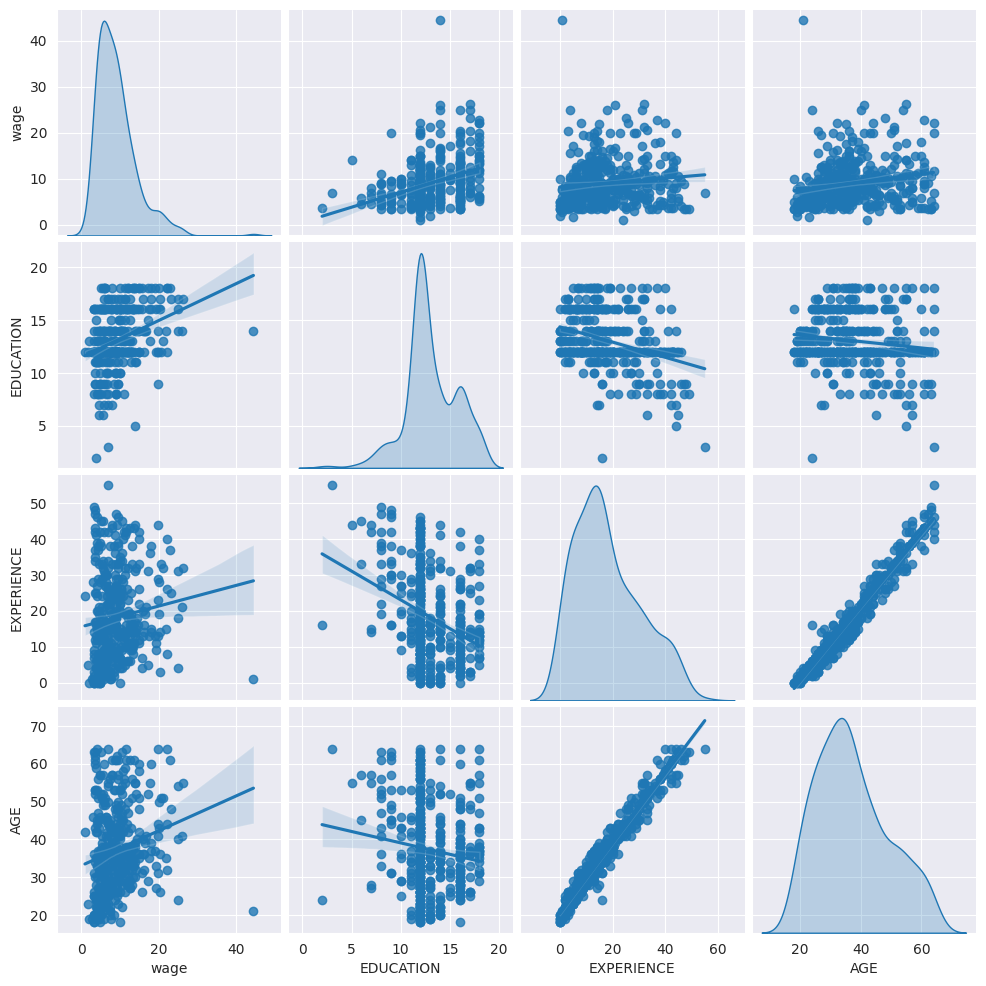

In [29]:
tr_ds = xtr.copy()
tr_ds.insert(0, "wage", ytr)

_ = sns.pairplot(tr_ds, kind="reg", diag_kind="kde")